# Fractals with Python
https://towardsdatascience.com/create-stunning-fractal-art-with-python-a-tutorial-for-beginners-c83817fcb64b

In [19]:
from PIL import Image
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# basic mandelbrot
Image.effect_mandelbrot((512, 512), (-3, -2.5, 2, 2.5), 100).show()

In [21]:
# complex numbers in python
num1 = 2 + 1j # same as complex(2, 1)
num2 = 12.3 + 23.1j

print(f"type(num1): {type(num1)}, type(num2): {type(num2)}")
print(f"num1 real part: {num1.real} and imaginary part: {num1.imag}")

type(num1): <class 'complex'>, type(num2): <class 'complex'>
num1 real part: 2.0 and imaginary part: 1.0


In [22]:
# important property of complex numbers: their absolute value (or magnitude) is their distance from the origin (0, 0) in the complex plane
print(abs(num1)) # same as print(abs(2 + 1j))

# which is calculated as (pythagoras)
print(math.sqrt(2**2 + 1**2))

2.23606797749979
2.23606797749979


## Mandelbrot Function

![Mandelbrot Function](mandelbrot-function.webp)

The first z is always 0. Subsequent elements are found by squaring the previous z and adding c to the result.

In [23]:
# Return the first n elements for a given c
def sequence(c, n=7):
    z_list = list()
    
    z = 0
    for _ in range(n):
        z = z ** 2 + c
        z_list.append(z)
    
    return z_list

In [24]:
sequence(1)

[1, 2, 5, 26, 677, 458330, 210066388901]

In [25]:
# Create sample data
df = pd.DataFrame()
df['element'] = [f"z_{i}" for i in range(7)]
df.head()

,element
0,z_0
1,z_1
2,z_2
3,z_3
4,z_4


In [26]:
some_example_cs = [0, 1, -1, 2, 0.25, -.1]

for c in some_example_cs:
    df[f"c={c}"] = sequence(c)
    
df

,element,c=0,c=1,c=-1,c=2,c=0.25,c=-0.1
0,z_0,0,1,-1,2,0.250000,-0.100000
1,z_1,0,2,0,6,0.312500,-0.090000
2,z_2,0,5,-1,38,0.347656,-0.091900
3,z_3,0,26,0,1446,0.370865,-0.091554
4,z_4,0,677,-1,2090918,0.387541,-0.091618
5,z_5,0,458330,0,4371938082726,0.400188,-0.091606
6,z_6,0,210066388901,-1,19113842599189892819591078,0.410150,-0.091608


3 types of results:
- when c is 1 or 2: Z is unbounded (diverges to infinity) as it grows
- when c is -1: Z fluctuaties between -1 and 0
- when c is 0.25 or -0.1: Z stays small

--> If Z diverges to infinity, it is not part of the Mandelbrot Set

--> If the Z sequence remains bounded, c is stable!

In [27]:
"""
To classify c as stable or unstable, we need to determine the number of iterations, which is not obvious due to the formula's sensitivity to small changes. However, researchers found all Mandelbrots stay within a radius of two, allowing for a few dozen iterations to identify membership.
"""

def is_stable(c, n_iterations=20):
    z = 0
    
    for _ in range(n_iterations):
        z = z ** 2 + c
        
        if abs(z) > 2:
            return False
        
    return True

In [28]:
print(f"is_stable(.26): {is_stable(.26)}")
print(f"is_stable(.27): {is_stable(.27)}")

is_stable(.26): True
is_stable(.27): False


In [29]:
# 30 iterations changes the stability of c=0.26. Values near the fractal's edge require more iterations for accurate classification
print(f"is_stable(.26, 30): {is_stable(.26, 30)}")
print(f"is_stable(.26): {is_stable(.26)}")

is_stable(.26, 30): False
is_stable(.26): True


In [30]:
"""
To plot the Mandelbrot fractal using Matplotlib, we should color all Mandelbrots black and unstable elements white.

We can normalize Matplotlib's grayscale to 0 and 1 (0 is white, 1 is black). This allows us to create a 2D array of complex numbers, apply the "is_stable" function, and plot a black-and-white visual of the Mandelbrot set.
"""

def candidate_values(xmin, xmax, ymin, ymax, pixel_density, log=False):
    log and print(f"xmin: {xmin}, xmax: {xmax}, ymin: {ymin}, ymax: {ymax}, pixel_density: {pixel_density}")
    log and print(f"num x: {int((xmax-xmin) * pixel_density)}, num y: {int((ymax-ymin) * pixel_density)}")

    # Generate a 2D grid of real and imaginary values
    real = np.linspace(xmin, xmax, num=int((xmax-xmin) * pixel_density))
    imag = np.linspace(ymin, ymax, num=int((ymax-ymin) * pixel_density))
    log and print(f"imag: {imag}, real: {real}")
    
    # Cross each row of `xx` with each column of `yy` to create a grid of values
    xx, yy = np.meshgrid(real, imag)
    log and print(f"xx: \n{xx}, \nyy: \n{yy}")
    
    # Combine the real and imaginary parts into complex numbers
    matrix = xx + 1j * yy
    
    return matrix

In [31]:
c = candidate_values(-2, 0, -1.2, 1.2, 1, log=True)
print(f"c.shape: {c.shape}")
c

xmin: -2, xmax: 0, ymin: -1.2, ymax: 1.2, pixel_density: 1
num x: 2, num y: 2
imag: [-1.2  1.2], real: [-2.  0.]
xx: 
[[-2.  0.]
 [-2.  0.]], 
yy: 
[[-1.2 -1.2]
 [ 1.2  1.2]]
c.shape: (2, 2)


array([[-2.-1.2j,  0.-1.2j],
       [-2.+1.2j,  0.+1.2j]])

In [32]:
# We can vectorize the "is_stable" function with np.vectorize and apply it to each element of c. This is done with 20 iterations.
mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=20)
print(f"mandelbrot_mask.shape: {mandelbrot_mask.shape}")
mandelbrot_mask

mandelbrot_mask.shape: (2, 2)


array([[False, False],
       [False, False]])

In [33]:
c = candidate_values(-2, 0.7, -1.2, 1.2, pixel_density=25)
print(f"c.shape: {c.shape}")
mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=20)
print(f"mandelbrot_mask.shape: {mandelbrot_mask.shape}")
mandelbrot_mask

c.shape: (60, 67)
mandelbrot_mask.shape: (60, 67)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

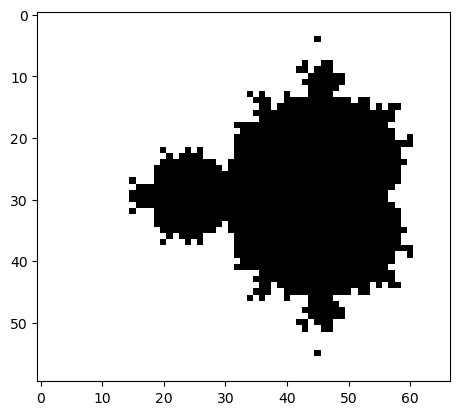

In [34]:
plt.imshow(mandelbrot_mask, cmap="binary")

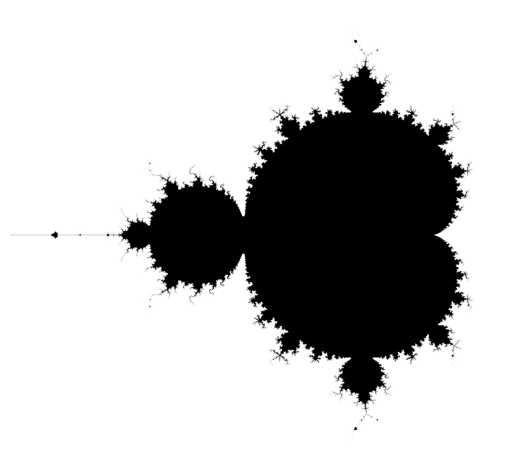

In [35]:
# Higher resolution: more pixel density and iteration count
c = candidate_values(-2, 0.7, -1.2, 1.2, pixel_density=1024)
mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=30)

plt.imshow(mandelbrot_mask, cmap="binary")
plt.gca().set_aspect("equal") # ensure equal x and y aspect ratio
plt.axis("off") # no x and y axis numbers
plt.tight_layout() # use entire canvas space